<a href="https://colab.research.google.com/github/aljoharas/datascience/blob/main/spotifyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Collection

In [10]:
!pip install spotipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 10.8 MB/s eta 0:00:00


In [15]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
#hide our api key for safety
auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)


In [11]:
import os
import requests


csv_urls = [
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-ae-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-au-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-br-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-by-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-ch-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-eg-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-gb-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-global-weekly-2025-09-18.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-hk-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-in-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-it-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-jp-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-kr-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-sa-weekly-2025-09-18.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-th-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-tr-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-tw-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-us-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-uy-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-ve-weekly-2025-08-07.csv",
]

for url in csv_urls:
    filename = os.path.join("/content", url.split("/")[-1])
    if not os.path.exists(filename):
        r = requests.get(url)
        if r.status_code == 200:
            with open(filename, "wb") as f:
                f.write(r.content)
        else:
            print(f"Failed to download {url} — status code {r.status_code}")

import glob
chart_files = glob.glob("/content/regional-*.csv")
print(f"Found {len(chart_files)} chart files")

Found 20 chart files


In [12]:
import time
import pandas as pd # Import pandas here
for f in chart_files:
    df = pd.read_csv(f)
    print(f"{f}: columns = {df.columns.tolist()}")

#filter out directories
chart_files = [f for f in chart_files if os.path.isfile(f)]

print(f"Found {len(chart_files)} CSV files")


dfs = [pd.read_csv(f) for f in chart_files]
all_artists = pd.concat([df['artist_names'] for df in dfs]).unique()

print(f"Total unique artists across all charts: {len(all_artists)}")

/content/regional-ae-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-kr-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-sa-weekly-2025-09-18.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-uy-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-by-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-hk-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart

In [29]:
import time
from spotipy.exceptions import SpotifyException
import requests
from requests.exceptions import ReadTimeout
import pandas as pd

artist_data = []
seen_ids = set()

for artist_name in all_artists:
    try:
        result = sp.search(q=f"artist:{artist_name}", type="artist", limit=1)
        if result['artists']['items']:
            a = result['artists']['items'][0]
            # skip if no genres or already seen
            if not a['genres'] or a['id'] in seen_ids:
                continue
            artist_data.append({
                "name": a['name'],
                "id": a['id'],
                "genres": a['genres'],
                "popularity": a['popularity']
            })
            seen_ids.add(a['id'])

        time.sleep(0.5)
    except (requests.exceptions.ConnectionError, SpotifyException, ReadTimeout) as e:
        print(f"Error fetching {artist_name}: {e}. Retrying in 5 seconds...")
        time.sleep(5)
        continue

#creating the dataframe
df_artists = pd.DataFrame(artist_data)


# Check for missing values
print("Missing values per column:\n", df_artists.isnull().sum())

# Drop duplicates based on artist ID
df_artists.drop_duplicates(subset='id', inplace=True)

# Convert genres list to comma-separated string for readability
df_artists['genres_str'] = df_artists['genres'].apply(lambda x: ', '.join(x))

# Confirm datatypes
print("\nData types after cleaning:\n", df_artists.dtypes)


print(f"Final dataset: {len(df_artists)} artists with non-empty genres")
display(df_artists)
output_path = "spotify_artists_cleaned.csv"
df_artists.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"CSV file saved successfully as '{output_path}'")




Missing values per column:
 name          0
id            0
genres        0
popularity    0
dtype: int64

Data types after cleaning:
 name          object
id            object
genres        object
popularity     int64
genres_str    object
dtype: object
✅ Final dataset: 708 artists with non-empty genres


,name,id,genres,popularity,genres_str
0,Aditya Rikhari,3ozYqVCLohfpXIhalkhM8D,"[hindi indie, indian indie, desi pop, hindi pop]",76,"hindi indie, indian indie, desi pop, hindi pop"
1,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,[soft pop],88,soft pop
2,Cup of Joe,61nn6nOoLWjVC1ER2qFAvN,"[opm, harana, p-pop, pinoy indie, kundiman]",75,"opm, harana, p-pop, pinoy indie, kundiman"
3,Ravyn Lenae,5RTLRtXjbXI2lSXc6jxlAz,"[alternative r&b, indie soul]",75,"alternative r&b, indie soul"
4,KATSEYE,3c0gDdb9lhnHGFtP4prQpn,[k-pop],82,k-pop
...,...,...,...,...,...
703,indigo la End,26ZBeXl5Gqr3TAv2itmyCU,"[japanese indie, j-rock, j-pop]",56,"japanese indie, j-rock, j-pop"
704,10-FEET,0QZqdhoRQkn1VphAa5eX8h,"[melodic hardcore, j-rock, j-pop]",52,"melodic hardcore, j-rock, j-pop"
705,YUZU,7lNFzeAXmSIKexINNgO6bu,"[j-pop, anime]",54,"j-pop, anime"
706,MY FIRST STORY,6cutt8thPFUICMfxaYerWd,"[j-rock, j-pop, anime]",59,"j-rock, j-pop, anime"


✅ CSV file saved successfully as 'spotify_artists_cleaned.csv'


===== Step 1: Adding genre_count and categorizing artists =====
✅ genre_count and genre_category added.

Sample data:


,name,id,genres,popularity,genres_str,genre_count,genre_category
0,Aditya Rikhari,3ozYqVCLohfpXIhalkhM8D,"[hindi indie, indian indie, desi pop, hindi pop]",76,"hindi indie, indian indie, desi pop, hindi pop",4,multi-genre
1,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,[soft pop],88,soft pop,1,single-genre
2,Cup of Joe,61nn6nOoLWjVC1ER2qFAvN,"[opm, harana, p-pop, pinoy indie, kundiman]",75,"opm, harana, p-pop, pinoy indie, kundiman",5,multi-genre
3,Ravyn Lenae,5RTLRtXjbXI2lSXc6jxlAz,"[alternative r&b, indie soul]",75,"alternative r&b, indie soul",2,multi-genre
4,KATSEYE,3c0gDdb9lhnHGFtP4prQpn,[k-pop],82,k-pop,1,single-genre


===== Step 2: Descriptive statistics by genre category =====
                count       mean        std  min   25%   50%   75%   max
genre_category                                                          
multi-genre     475.0  62.040000  12.752284  5.0  55.0  61.0  71.0  95.0
single-genre    233.0  58.008584  18.750630  0.0  45.0  61.0  72.0  95.0 

===== Descriptive Statistics =====


,popularity,genre_count
count,708.000000,708.000000
mean,60.713277,2.413842
std,15.099425,1.406061
min,0.000000,1.000000
25%,53.000000,1.000000
50%,61.000000,2.000000
75%,71.000000,3.000000
max,95.000000,8.000000


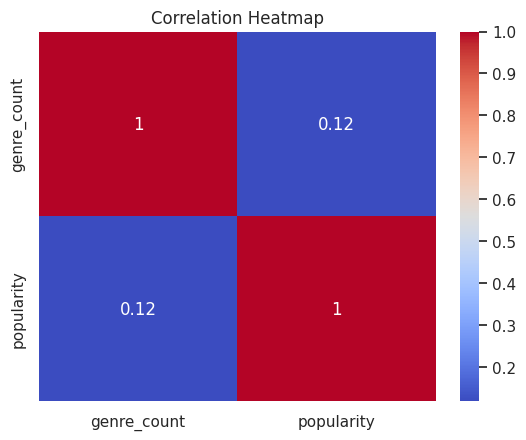

===== Step 3: Boxplot - Popularity by Genre Category =====


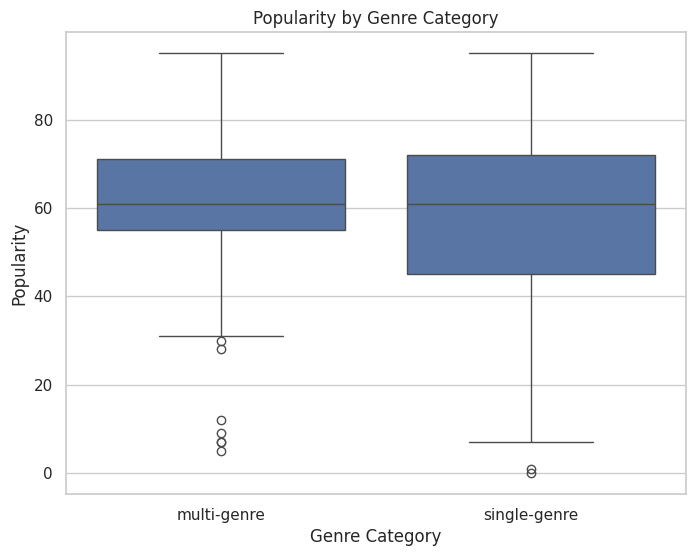

===== Step 4: Scatter plot - Popularity vs Number of Genres =====


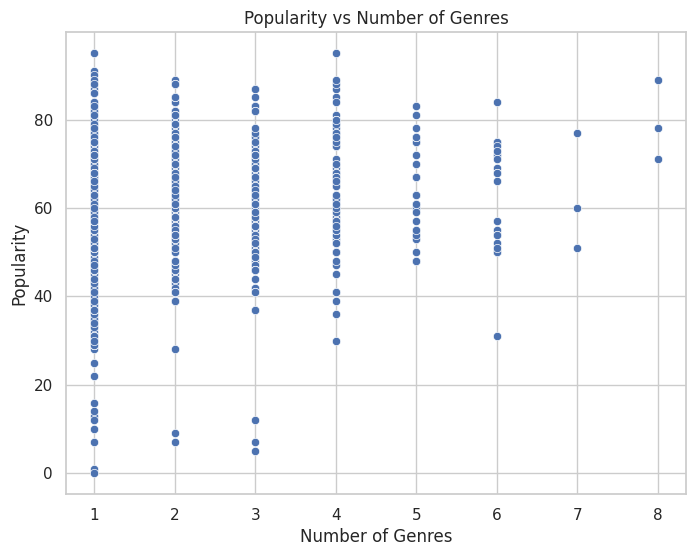

===== Step 5: Histogram of Artist Popularity =====


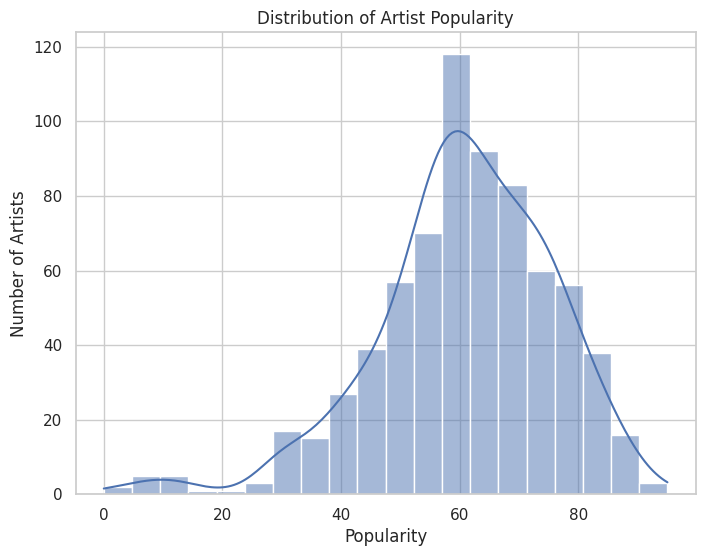

===== Step 6: Count of Single-Genre vs Multi-Genre Artists =====


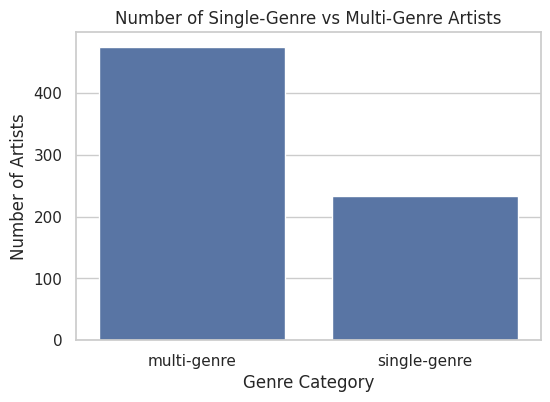

===== Step 7: Popularity vs Number of Genres (with Trend Line) =====


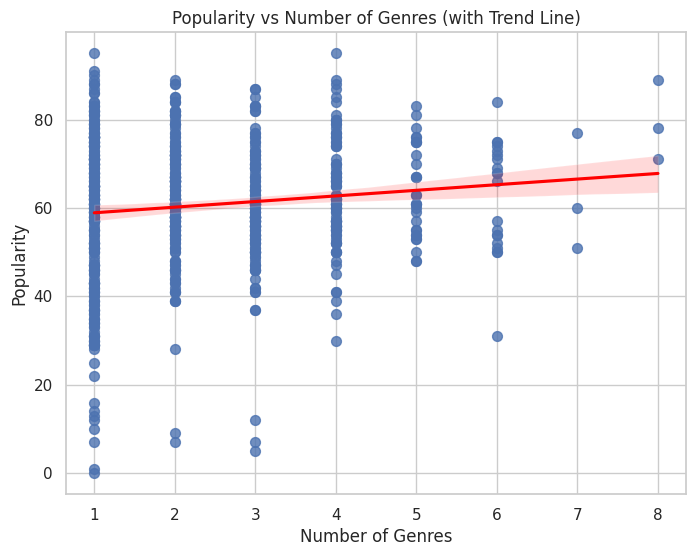

✅ All analysis and visualizations completed.


In [37]:

# Full Analysis and Visualization


print("===== Step 1: Adding genre_count and categorizing artists =====")
df_artists['genre_count'] = df_artists['genres'].apply(len)
df_artists['genre_category'] = df_artists['genre_count'].apply(lambda x: 'single-genre' if x == 1 else 'multi-genre')
print("genre_count and genre_category added.")
print("\nSample data:")
display(df_artists.head())

#Descriptive statistics

print("===== Step 2: Descriptive statistics by genre category =====")
stats = df_artists.groupby('genre_category')['popularity'].describe()
print(stats, "\n")


# Summary Statistics

print("===== Descriptive Statistics =====")
display(df_artists.describe())


#Correlation Analysis

import seaborn as sns
import matplotlib.pyplot as plt

corr = df_artists[['genre_count', 'popularity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



# Step 3: Boxplot - Popularity by genre category

import matplotlib.pyplot as plt
import seaborn as sns

print("===== Step 3: Boxplot - Popularity by Genre Category =====")
plt.figure(figsize=(8,6))
sns.boxplot(x='genre_category', y='popularity', data=df_artists)
plt.title('Popularity by Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Popularity')
plt.show()


#Scatter plot - genre_count vs popularity

print("===== Step 4: Scatter plot - Popularity vs Number of Genres =====")
plt.figure(figsize=(8,6))
sns.scatterplot(x='genre_count', y='popularity', data=df_artists)
plt.title('Popularity vs Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Popularity')
plt.show()


#Histogram of popularity

print("===== Step 5: Histogram of Artist Popularity =====")
plt.figure(figsize=(8,6))
sns.histplot(df_artists['popularity'], bins=20, kde=True)
plt.title('Distribution of Artist Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Artists')
plt.show()


#Countplot of genre categories
print("===== Step 6: Count of Single-Genre vs Multi-Genre Artists =====")
plt.figure(figsize=(6,4))
sns.countplot(x='genre_category', data=df_artists)
plt.title('Number of Single-Genre vs Multi-Genre Artists')
plt.xlabel('Genre Category')
plt.ylabel('Number of Artists')
plt.show()


#Scatter with regression line

print("===== Step 7: Popularity vs Number of Genres (with Trend Line) =====")
plt.figure(figsize=(8,6))
sns.regplot(x='genre_count', y='popularity', data=df_artists, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Popularity vs Number of Genres (with Trend Line)')
plt.xlabel('Number of Genres')
plt.ylabel('Popularity')
plt.show()

print("✅ All analysis and visualizations completed.")


# Secondary Data

 Loaded dataset: 1000 rows, 23 columns


,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,0.646,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,0.630,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,0.362,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726
3,3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,...,0.825,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091
4,4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,...,0.775,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998


🧹 After removing duplicate artists: 118 unique artists remain.

===== Descriptive Statistics =====


,artist_popularity,genre_count
count,118.000000,118.000000
mean,58.601695,2.449153
std,32.523795,2.281840
min,0.000000,0.000000
25%,35.000000,0.000000
50%,75.000000,2.000000
75%,81.000000,4.000000
max,92.000000,9.000000


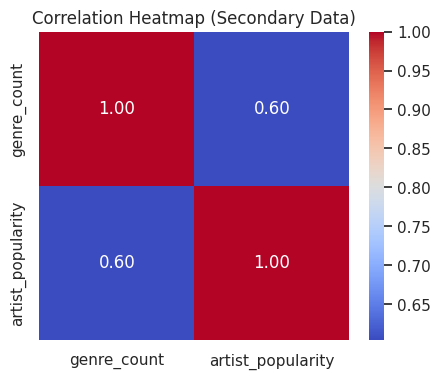

/tmp/ipython-input-3255840425.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre_category', y='artist_popularity', data=sec, palette='Set2')


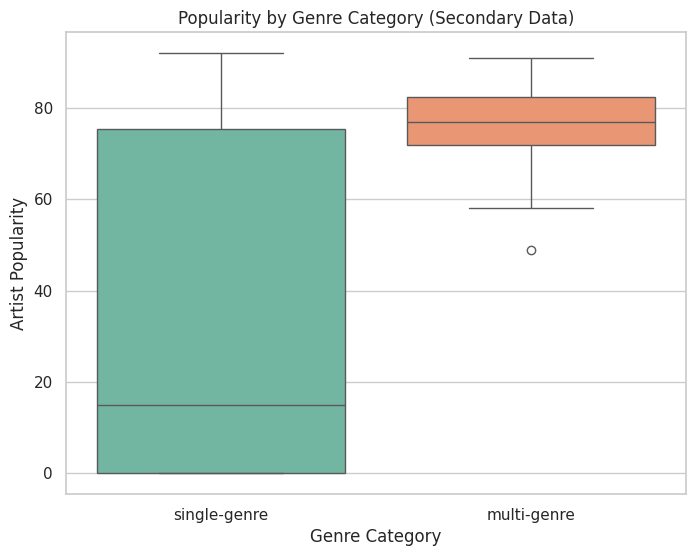

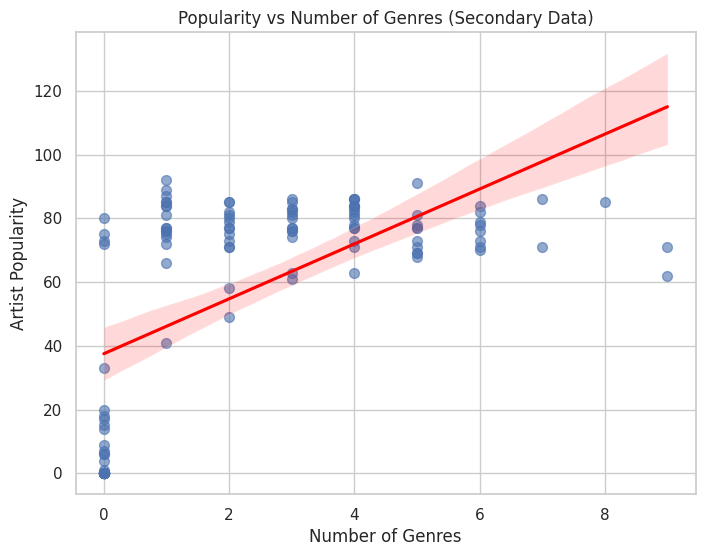

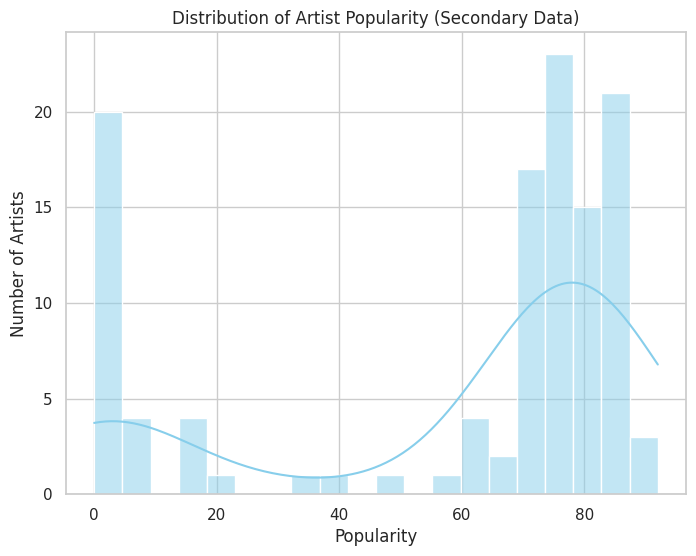

/tmp/ipython-input-3255840425.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre_category', data=sec, palette='pastel')


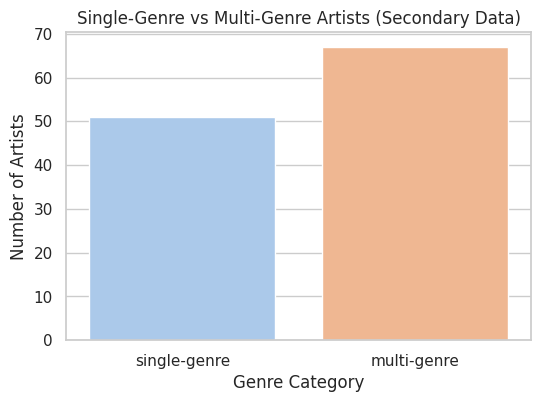

In [48]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sec = pd.read_csv('https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/spotifydataset.csv')
print(f" Loaded dataset: {sec.shape[0]} rows, {sec.shape[1]} columns")
display(sec.head())



if 'artist_url' in sec.columns:
    sec.drop_duplicates(subset='artist_url', inplace=True)
elif 'artist_name' in sec.columns:
    sec.drop_duplicates(subset='artist_name', inplace=True)
elif 'id' in sec.columns:
    sec.drop_duplicates(subset='id', inplace=True)

print(f"🧹 After removing duplicate artists: {len(sec)} unique artists remain.")


def count_genres(entry):
    """Counts genres for list-like or comma-separated strings; returns 0 if missing/empty."""
    if entry is None or (isinstance(entry, float) and np.isnan(entry)):
        return 0
    if isinstance(entry, list):
        return len(entry)
    if isinstance(entry, str):
        parts = [g.strip() for g in entry.split(',') if g.strip()]
        return len(parts)
    return 0

# --- Feature engineering ---
sec['genre_count'] = sec['genres'].apply(count_genres)
sec['genre_category'] = sec['genre_count'].apply(lambda x: 'single-genre' if x <= 1 else 'multi-genre')


# 1) Descriptive statistics
print("\n===== Descriptive Statistics =====")
display(sec[['artist_popularity', 'genre_count']].describe())

# 2) Correlation heatmap
plt.figure(figsize=(5,4))
sns.heatmap(sec[['genre_count', 'artist_popularity']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Secondary Data)')
plt.show()

# 3) Boxplot: Popularity by Genre Category
plt.figure(figsize=(8,6))
sns.boxplot(x='genre_category', y='artist_popularity', data=sec, palette='Set2')
plt.title('Popularity by Genre Category (Secondary Data)')
plt.xlabel('Genre Category')
plt.ylabel('Artist Popularity')
plt.show()

# 4) Scatter + regression: Popularity vs Number of Genres
plt.figure(figsize=(8,6))
sns.regplot(x='genre_count', y='artist_popularity', data=sec,
            scatter_kws={'s':50, 'alpha':0.6}, line_kws={'color':'red'})
plt.title('Popularity vs Number of Genres (Secondary Data)')
plt.xlabel('Number of Genres')
plt.ylabel('Artist Popularity')
plt.show()

# 5) Histogram: Distribution of Popularity
plt.figure(figsize=(8,6))
sns.histplot(sec['artist_popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Artist Popularity (Secondary Data)')
plt.xlabel('Popularity')
plt.ylabel('Number of Artists')
plt.show()

# 6) Countplot: Single vs Multi-Genre
plt.figure(figsize=(6,4))
sns.countplot(x='genre_category', data=sec, palette='pastel')
plt.title('Single-Genre vs Multi-Genre Artists (Secondary Data)')
plt.xlabel('Genre Category')
plt.ylabel('Number of Artists')
plt.show()



# Comparison

Comparison of Primary vs Secondary Dataset Metrics:


,Metric,Primary Data,Secondary Data
0,Average Popularity,60.713277,58.601695
1,Median Popularity,61.000000,75.000000
2,Std Dev Popularity,15.099425,32.523795
3,Avg Genre Count,2.413842,2.449153
4,Median Genre Count,2.000000,2.000000
5,Single-Genre %,32.909605,43.220339
6,Multi-Genre %,67.090395,56.779661
7,Num Artists,708.000000,118.000000


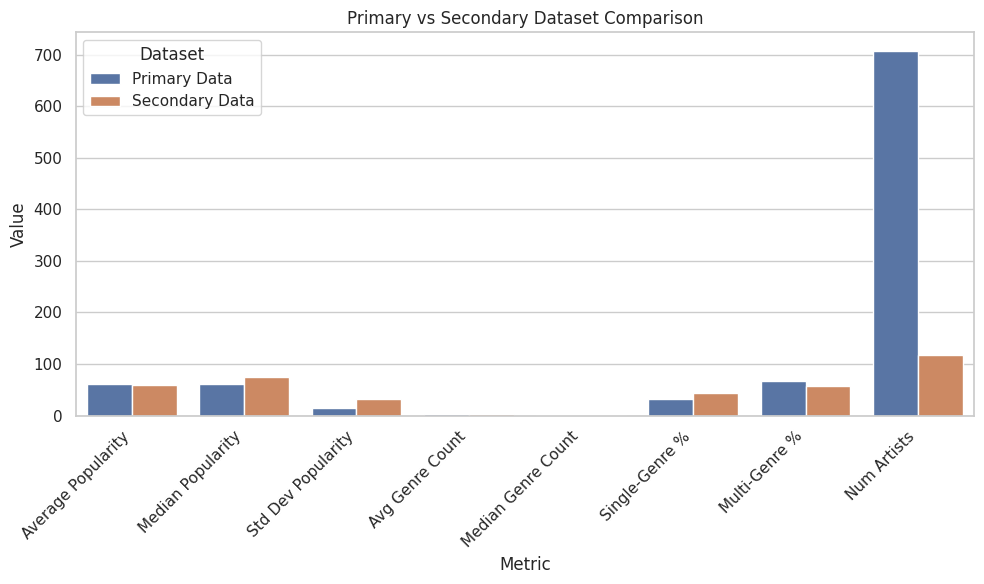

In [44]:

# COMPARISON: Primary vs Secondary Data Metrics

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



primary = df_artists.copy()
secondary = sec.copy()

# Standardize column names
primary = primary.rename(columns={'popularity': 'artist_popularity'})
secondary = secondary.rename(columns={'artist_popularity': 'artist_popularity'})

# --- Calculate metrics for each dataset ---
primary_metrics = {
    'Average Popularity': primary['artist_popularity'].mean(),
    'Median Popularity': primary['artist_popularity'].median(),
    'Std Dev Popularity': primary['artist_popularity'].std(),
    'Avg Genre Count': primary['genre_count'].mean(),
    'Median Genre Count': primary['genre_count'].median(),
    'Single-Genre %': (primary['genre_category'].value_counts(normalize=True).get('single-genre', 0)) * 100,
    'Multi-Genre %': (primary['genre_category'].value_counts(normalize=True).get('multi-genre', 0)) * 100,
    'Num Artists': len(primary)
}

secondary_metrics = {
    'Average Popularity': secondary['artist_popularity'].mean(),
    'Median Popularity': secondary['artist_popularity'].median(),
    'Std Dev Popularity': secondary['artist_popularity'].std(),
    'Avg Genre Count': secondary['genre_count'].mean(),
    'Median Genre Count': secondary['genre_count'].median(),
    'Single-Genre %': (secondary['genre_category'].value_counts(normalize=True).get('single-genre', 0)) * 100,
    'Multi-Genre %': (secondary['genre_category'].value_counts(normalize=True).get('multi-genre', 0)) * 100,
    'Num Artists': len(secondary)
}

# --- Combine into a comparison table ---
comparison_df = pd.DataFrame({
    'Metric': list(primary_metrics.keys()),
    'Primary Data': list(primary_metrics.values()),
    'Secondary Data': list(secondary_metrics.values())
})

print("Comparison of Primary vs Secondary Dataset Metrics:")
display(comparison_df)


plt.figure(figsize=(10,6))
melted = comparison_df.melt(id_vars='Metric', var_name='Dataset', value_name='Value')
sns.barplot(data=melted, x='Metric', y='Value', hue='Dataset')
plt.xticks(rotation=45, ha='right')
plt.title('Primary vs Secondary Dataset Comparison')
plt.tight_layout()
plt.show()


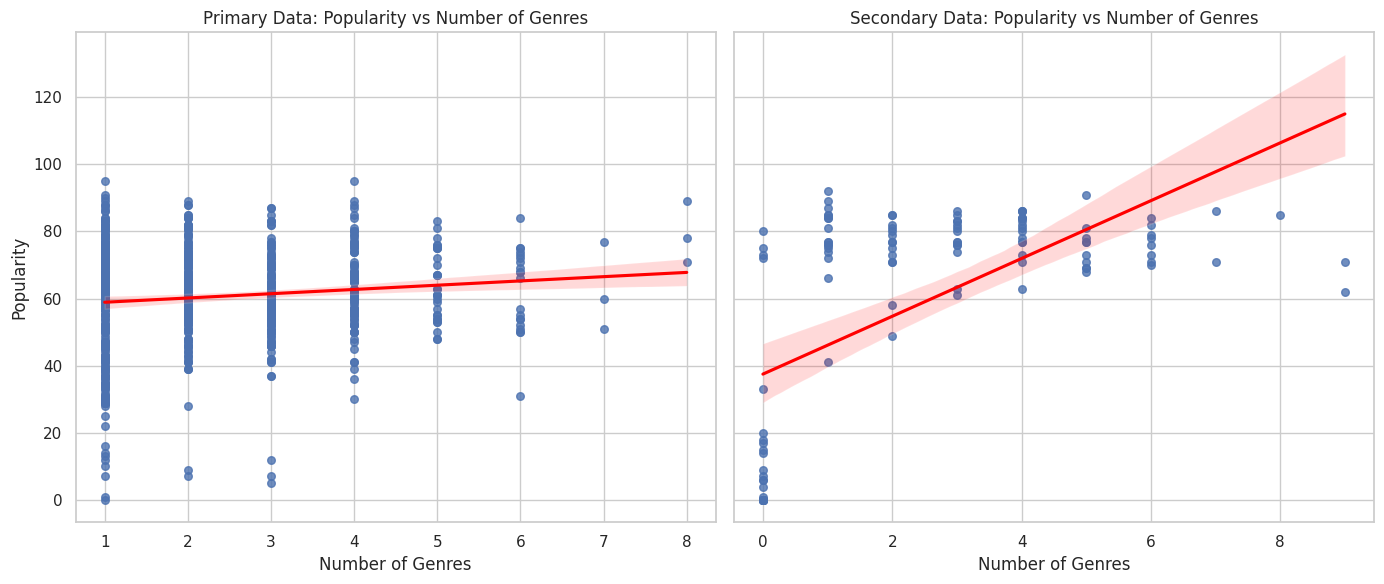

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.regplot(x='genre_count', y='popularity', data=df_artists, ax=axes[0], scatter_kws={'s':30}, line_kws={'color':'red'})
axes[0].set_title('Primary Data: Popularity vs Number of Genres')
axes[0].set_xlabel('Number of Genres')
axes[0].set_ylabel('Popularity')

sns.regplot(x='genre_count', y='artist_popularity', data=sec, ax=axes[1], scatter_kws={'s':30}, line_kws={'color':'red'})
axes[1].set_title('Secondary Data: Popularity vs Number of Genres')
axes[1].set_xlabel('Number of Genres')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [49]:
import pandas as pd
import numpy as np

def count_genres(entry):
    """Return number of genres for list-like or comma-separated strings; 0 if missing/empty."""
    if entry is None or (isinstance(entry, float) and np.isnan(entry)):
        return 0
    if isinstance(entry, list):
        return len(entry)
    if isinstance(entry, str):
        parts = [g.strip() for g in entry.split(',') if g.strip()]
        return len(parts)
    return 0

def ensure_genre_columns(df, pop_col, genres_col):
    """
    Ensure df has:
      - artist_popularity (renamed from pop_col if needed)
      - genre_count from genres_col
      - genre_category from genre_count (<=1 => single, >1 => multi)
    Returns a cleaned copy with key cols present.
    """
    out = df.copy()
    if 'artist_popularity' not in out.columns:
        out = out.rename(columns={pop_col: 'artist_popularity'})
    if 'genre_count' not in out.columns:
        out['genre_count'] = out[genres_col].apply(count_genres)
    if 'genre_category' not in out.columns:
        out['genre_category'] = out['genre_count'].apply(lambda x: 'single-genre' if x <= 1 else 'multi-genre')
    out = out.dropna(subset=['artist_popularity'])
    return out

def summarize_by_category(df):
    """
    Group by genre_category on artist_popularity and compute:
      Count, Mean, Std, Median, 25%, 75%, Min, Max, plus formatted Range string.
    Returns a tidy DataFrame with desired columns in desired order.
    """
    agg = (
        df.groupby('genre_category')['artist_popularity']
          .agg(count='count', mean='mean', std='std', median='median', min='min', max='max',
               q25=lambda x: x.quantile(0.25), q75=lambda x: x.quantile(0.75))
    )

    # rounding + formatting
    agg['count']  = agg['count'].astype(int)
    agg['mean']   = agg['mean'].round(2)
    agg['std']    = agg['std'].round(2)
    agg['median'] = agg['median'].round(1)
    agg['q25']    = agg['q25'].round(1)
    agg['q75']    = agg['q75'].round(1)
    agg['Range (Min–Max)'] = agg['min'].astype(int).astype(str) + ' – ' + agg['max'].astype(int).astype(str)

    # rename & reorder
    agg = agg.rename(columns={
        'count': 'Count',
        'mean': 'Mean Popularity',
        'std': 'Std. Deviation',
        'median': 'Median (50%)',
        'q25': '25%',
        'q75': '75%'
    })[['Count', 'Mean Popularity', 'Std. Deviation', '25%', 'Median (50%)', '75%', 'Range (Min–Max)']]

    return agg

def build_side_by_side(primary_df, secondary_df):

    p = summarize_by_category(primary_df)
    s = summarize_by_category(secondary_df)

    all_cats = sorted(set(p.index).union(set(s.index)))
    metrics = ['Count', 'Mean Popularity', 'Std. Deviation', '25%', 'Median (50%)', '75%', 'Range (Min–Max)']

    rows = []
    for cat in all_cats:
        for m in metrics:
            p_val = p.loc[cat, m] if (cat in p.index and m in p.columns) else np.nan
            s_val = s.loc[cat, m] if (cat in s.index and m in s.columns) else np.nan
            rows.append((cat, m, p_val, s_val))

    comp = pd.DataFrame(rows, columns=['Genre Category', 'Metric', 'Primary Dataset', 'Secondary Dataset'])
    return comp.set_index(['Genre Category', 'Metric'])

# ---------- Prepare inputs ----------
primary_ready   = ensure_genre_columns(df_artists, pop_col='popularity',        genres_col='genres')
secondary_ready = ensure_genre_columns(sec,        pop_col='artist_popularity', genres_col='genres')

# ---------- Compute tables ----------
primary_stats    = summarize_by_category(primary_ready)
secondary_stats  = summarize_by_category(secondary_ready)
comparison_table = build_side_by_side(primary_ready, secondary_ready)

print("Primary dataset — per-category metrics")
display(primary_stats)

print("\nSecondary dataset — per-category metrics")
display(secondary_stats)

print("\nPer-Category Metrics: Primary vs Secondary (side-by-side)")
display(comparison_table)


Primary dataset — per-category metrics


,Count,Mean Popularity,Std. Deviation,25%,Median (50%),75%,Range (Min–Max)
genre_category,,,,,,,
multi-genre,475,62.04,12.75,55.0,61.0,71.0,5 – 95
single-genre,233,58.01,18.75,45.0,61.0,72.0,0 – 95



Secondary dataset — per-category metrics


,Count,Mean Popularity,Std. Deviation,25%,Median (50%),75%,Range (Min–Max)
genre_category,,,,,,,
multi-genre,67,76.78,7.75,72.0,77.0,82.5,49 – 91
single-genre,51,34.73,37.04,0.0,15.0,75.5,0 – 92



Per-Category Metrics: Primary vs Secondary (side-by-side)


Primary Dataset Secondary Dataset
Genre Category Metric                                           
multi-genre    Count                       475                67
               Mean Popularity           62.04             76.78
               Std. Deviation            12.75              7.75
               25%                        55.0              72.0
               Median (50%)               61.0              77.0
               75%                        71.0              82.5
               Range (Min–Max)          5 – 95           49 – 91
single-genre   Count                       233                51
               Mean Popularity           58.01             34.73
               Std. Deviation            18.75             37.04
               25%                        45.0               0.0
               Median (50%)               61.0              15.0
               75%                        72.0              75.5
               Range (Min–Max)          0 – 95            0 – 92